In [2]:
# import necessary libraries

# File read and EDA(Data Cleansing & Transformations)
import numpy as np  
import pandas as pd 

# EDA Visualization
import matplotlib.pyplot as plt
import seaborn as sns

D:\anaocnda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### preprocess the data

In [3]:
sp_df = pd.read_csv('dataset_mood_smartphone.csv')
sp_df.loc[:,('time')] = pd.to_datetime(sp_df.time)
sp_df.drop(columns=['Unnamed: 0'], inplace=True)
# Create variables for the unique variables & ids used in the research
score_variables = sp_df.variable.unique()[0:4]
print(score_variables)
other_variables = sp_df.variable.unique()[4:5]
print(other_variables)
social_variables = sp_df.variable.unique()[5:7]
app_variables = sp_df.variable.unique()[7:]
ids = sp_df.id.unique()
# convert exact time into one day
dates = pd.date_range(start=sp_df.time.min().round('D'), end=sp_df.time.max().round('D'), freq='D')
sp_df.columns

['mood' 'circumplex.arousal' 'circumplex.valence' 'activity']
['screen']


Index(['id', 'time', 'variable', 'value'], dtype='object')

In [4]:
# create a new dataframe for reconstruting data from csv
# we wanna group all the data according to ID
fix_df = pd.DataFrame(np.nan,
                    index = pd.MultiIndex.from_product([sp_df.id.unique(),dates], names = ["ID", "time"]),
                    columns= sp_df.variable.unique())
fix_df

mood  circumplex.arousal  circumplex.valence  activity  \
ID      time                                                                 
AS14.01 2014-02-17   NaN                 NaN                 NaN       NaN   
        2014-02-18   NaN                 NaN                 NaN       NaN   
        2014-02-19   NaN                 NaN                 NaN       NaN   
        2014-02-20   NaN                 NaN                 NaN       NaN   
        2014-02-21   NaN                 NaN                 NaN       NaN   
...                  ...                 ...                 ...       ...   
AS14.33 2014-06-05   NaN                 NaN                 NaN       NaN   
        2014-06-06   NaN                 NaN                 NaN       NaN   
        2014-06-07   NaN                 NaN                 NaN       NaN   
        2014-06-08   NaN                 NaN                 NaN       NaN   
        2014-06-09   NaN                 NaN                 NaN       NaN   

                    screen  call  sms  appCat.builtin  appCat.communication  \
ID      time                                                                  
AS14.01 2014-02-17     NaN   NaN  NaN             NaN                   NaN   
        2014-02-18     NaN   NaN  NaN             NaN                   NaN   
        2014-02-19     NaN   NaN  NaN             NaN                   NaN   
        2014-02-20     NaN   NaN  NaN             NaN                   NaN   
        2014-02-21     NaN   NaN  NaN             NaN                   NaN   
...                    ...   ...  ...             ...                   ...   
AS14.33 2014-06-05     NaN   NaN  NaN             NaN                   NaN   
        2014-06-06     NaN   NaN  NaN             NaN                   NaN   
        2014-06-07     NaN   NaN  NaN             NaN                   NaN   
        2014-06-08     NaN   NaN  NaN             NaN                   NaN   
        2014-06-09     NaN   NaN  NaN             NaN                   NaN   

                    appCat.entertainment  appCat.finance  appCat.game  \
ID      time                                                            
AS14.01 2014-02-17                   NaN             NaN          NaN   
        2014-02-18                   NaN             NaN          NaN   
        2014-02-19                   NaN             NaN          NaN   
        2014-02-20                   NaN             NaN          NaN   
        2014-02-21                   NaN             NaN          NaN   
...                                  ...             ...          ...   
AS14.33 2014-06-05                   NaN             NaN          NaN   
        2014-06-06                   NaN             NaN          NaN   
        2014-06-07                   NaN             NaN          NaN   
        2014-06-08                   NaN             NaN          NaN   
        2014-06-09                   NaN             NaN          NaN   

                    appCat.office  appCat.other  appCat.social  appCat.travel  \
ID      time                                                                    
AS14.01 2014-02-17            NaN           NaN            NaN            NaN   
        2014-02-18            NaN           NaN            NaN            NaN   
        2014-02-19            NaN           NaN            NaN            NaN   
        2014-02-20            NaN           NaN            NaN            NaN   
        2014-02-21            NaN           NaN            NaN            NaN   
...                           ...           ...            ...            ...   
AS14.33 2014-06-05            NaN           NaN            NaN            NaN   
        2014-06-06            NaN           NaN            NaN            NaN   
        2014-06-07            NaN           NaN            NaN            NaN   
        2014-06-08            NaN           NaN            NaN            NaN   
        2014-06-09            NaN           NaN        

In [5]:
count = 0;
for i in ids:
    id_data = sp_df[sp_df['id'] == i]
    #  set time as the key
    id_data.set_index('time', inplace=True)
    for j in score_variables:
        # Calculate the scores of each day mean value
        sub_df = id_data[id_data.variable == j].value.resample('D').mean()
        used_dates = np.array(sub_df.index.strftime('%Y-%m-%d'))
        for k in used_dates:
            fix_df.loc[i, j].loc[k] = sub_df[k]
    for j in other_variables:
        sub_df = id_data[id_data.variable == j].value.resample('D').sum()
        used_dates = np.array(sub_df.index.strftime('%Y-%m-%d'))
        for k in used_dates:
            fix_df.loc[i, j].loc[k] = sub_df[k]
    for j in social_variables:
        sub_df = id_data[id_data.variable == j].value.resample('D').sum()
        used_dates = np.array(sub_df.index.strftime('%Y-%m-%d'))
        for k in used_dates:
            fix_df.loc[i, j].loc[k] = sub_df[k]
    for j in app_variables:
        sub_df = id_data[id_data.variable == j].value.resample('D').sum()
        used_dates = np.array(sub_df.index.strftime('%Y-%m-%d'))
        for k in used_dates:
            fix_df.loc[i, j].loc[k] = sub_df[k]
    print("Finished:",i)
print("all the data in sp_df has been transformed to fix_df")

Finished: AS14.01
Finished: AS14.02
Finished: AS14.03
Finished: AS14.05
Finished: AS14.06
Finished: AS14.07
Finished: AS14.08
Finished: AS14.09
Finished: AS14.12
Finished: AS14.13
Finished: AS14.14
Finished: AS14.15
Finished: AS14.16
Finished: AS14.17
Finished: AS14.19
Finished: AS14.20
Finished: AS14.23
Finished: AS14.24
Finished: AS14.25
Finished: AS14.26
Finished: AS14.27
Finished: AS14.28
Finished: AS14.29
Finished: AS14.30
Finished: AS14.31
Finished: AS14.32
Finished: AS14.33
all the data in sp_df has been transformed to fix_df


In [6]:
fix_df.describe()

,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
count,1268.000000,1268.000000,1266.000000,1188.000000,1237.000000,2042.000000,1915.000000,1230.000000,1234.000000,1095.000000,418.000000,325.000000,617.000000,1200.000000,1167.000000,972.000000,652.000000,864.000000,292.000000
mean,6.990063,-0.103851,0.687112,0.120003,5881.748977,2.565622,0.938903,1375.870611,2608.916941,930.832901,48.871246,321.176563,206.466948,164.544101,1187.775905,133.899176,65.604713,53.359829,17.595623
std,0.736465,0.662715,0.434602,0.098301,4731.232574,3.427109,1.869271,3793.920938,2474.806134,1764.672253,119.906806,940.003264,1440.458239,384.271423,1892.696108,501.508817,216.898841,173.967160,39.808478
min,3.000000,-2.000000,-1.250000,0.000000,0.000000,0.000000,0.000000,-80367.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.600000,-0.600000,0.400000,0.054872,2261.391001,0.000000,0.000000,236.363000,746.281250,15.709500,0.000000,0.000000,0.000000,40.682500,68.987000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,0.800000,0.095634,4942.536000,1.000000,0.000000,726.573000,1990.120000,364.104000,0.000000,48.879000,0.000000,61.490500,509.768000,0.000000,0.000000,1.002500,0.000000
75%,7.500000,0.400000,1.000000,0.149358,8390.178000,4.000000,1.000000,1527.240000,3705.815500,1168.583500,49.358750,275.675000,51.786000,127.790000,1675.439500,121.350500,41.681750,26.567000,20.300500
max,9.333333,2.000000,2.000000,0.566171,36204.105001,31.000000,17.000000,40323.877000,20718.749000,35937.645000,1321.104000,12996.495000,33283.021000,4335.307000,30073.421000,10548.116000,2821.547000,2257.626000,366.937000


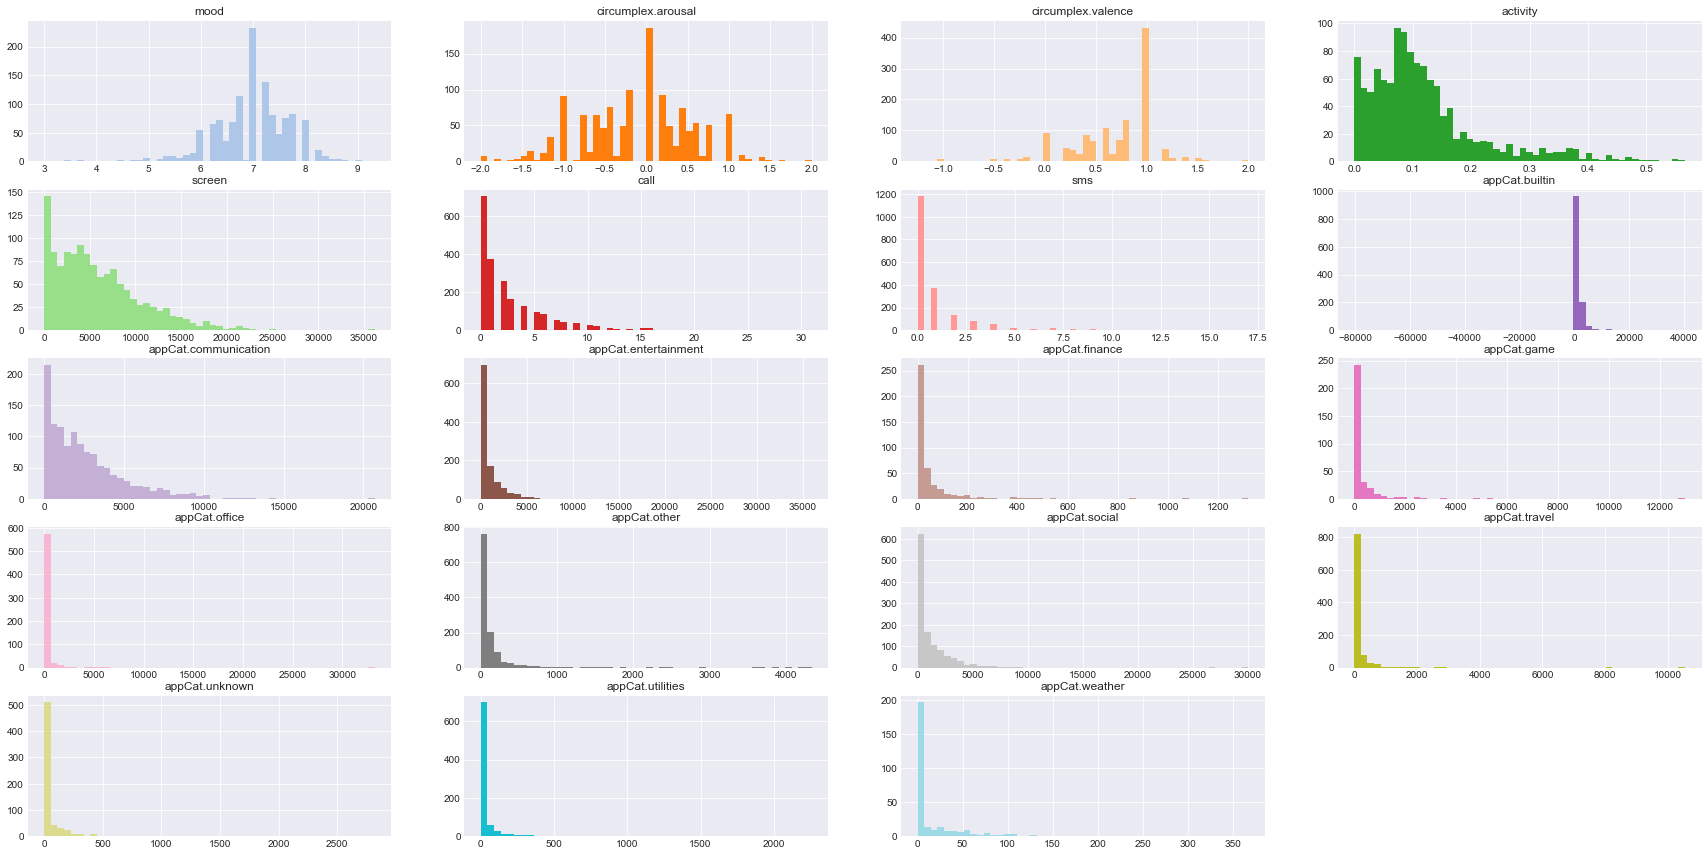

In [7]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20')

num=1
f= plt.figure(figsize=(30,15))
for var in list(fix_df.columns.array):
    ax = f.add_subplot(5,4,num)
    a = np.asarray(fix_df[var].dropna())
    ax.hist(a, bins=50, color=palette(num))
    ax.set_title(var)
    num+=1

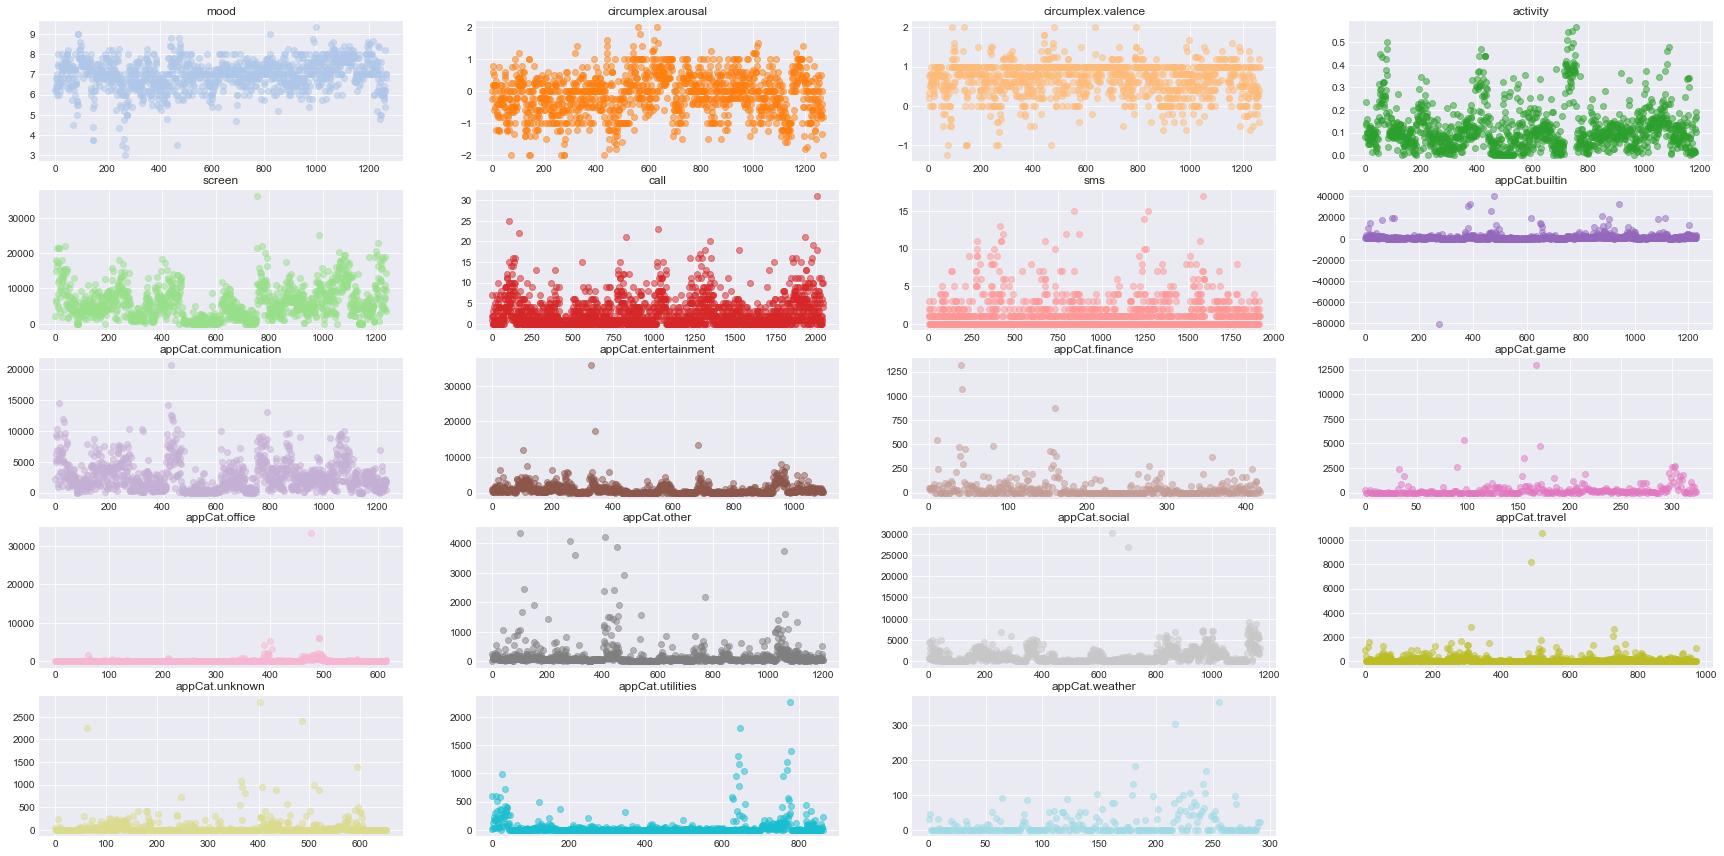

In [8]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20')

num = 1
f = plt.figure(figsize=(30, 15))
for var in list(fix_df.columns.array):
    ax = f.add_subplot(5, 4, num)
    a = np.asarray(fix_df[var].dropna())
    ax.scatter(range(len(a)), a, color=palette(num), alpha=0.5)
    ax.set_title(var)
    num += 1

plt.show()

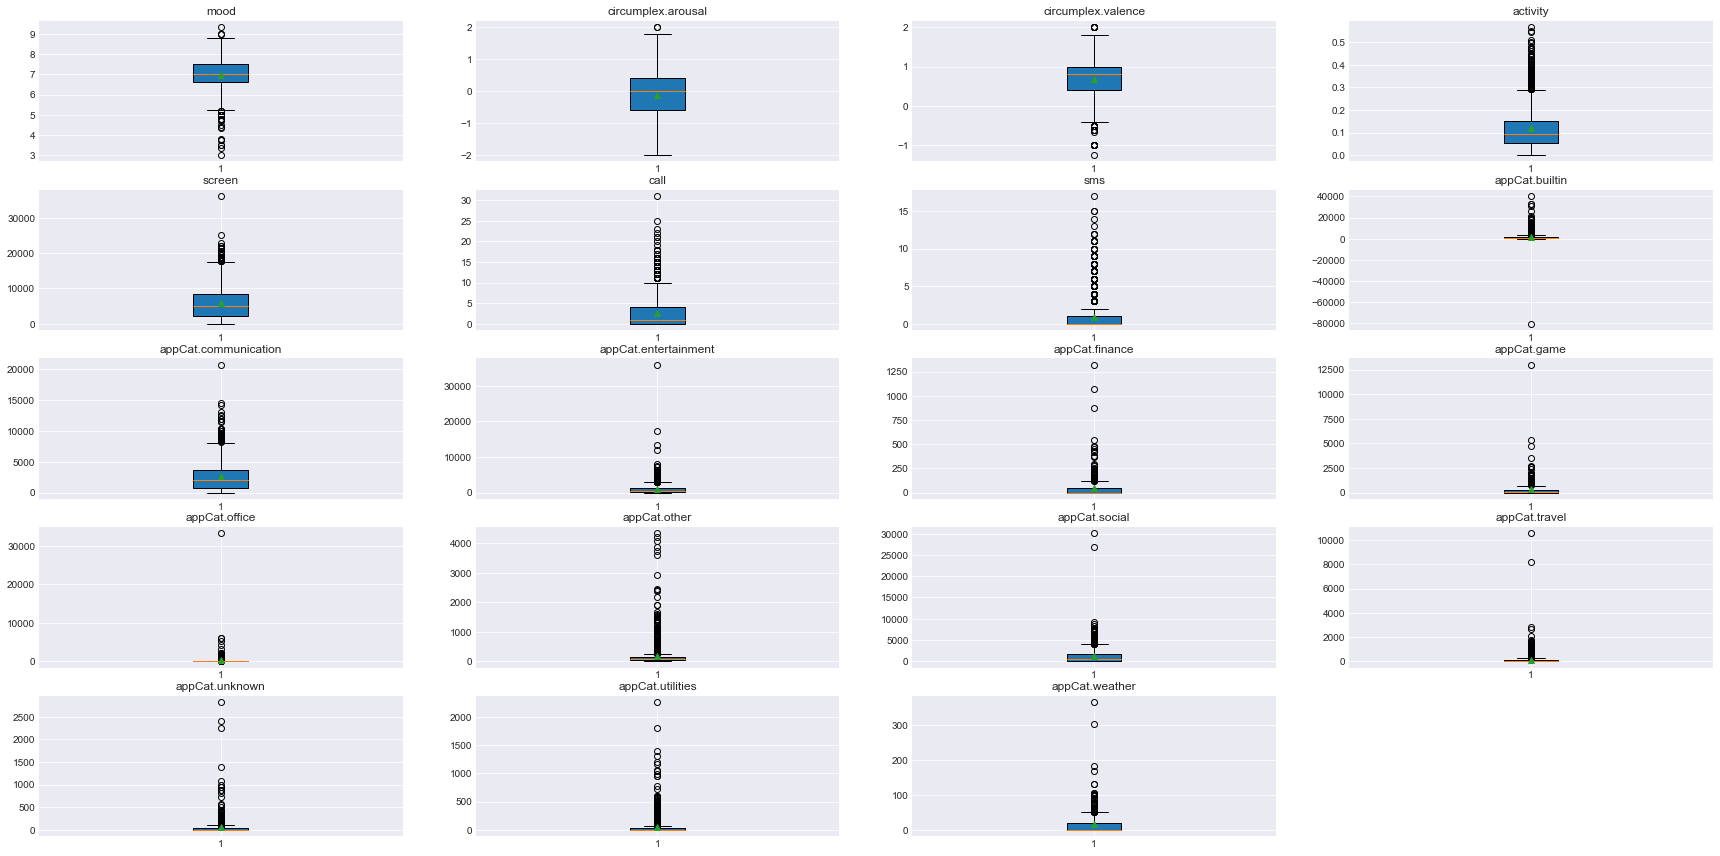

In [9]:
# box - plot
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20')

num = 1
f = plt.figure(figsize=(30, 15))
for var in list(fix_df.columns.array):
    ax = f.add_subplot(5, 4, num)
    data = fix_df[var].dropna()
    ax.boxplot(data, patch_artist=True, showmeans=True)
    ax.set_title(var)
    num += 1

plt.show()

As we can see from the charts above, we can discover that there are a lot of NAN value and outlier in our preprocessed dataset. In addition, from the description of fix_df and the box-plot of appCat.builtin, we can find that its impossible that the min of appCat.builtin is below 0, so we gonna clean it. This is a outlier, we can just set it as NAN.

In [10]:
fix_df.describe()

,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
count,1268.000000,1268.000000,1266.000000,1188.000000,1237.000000,2042.000000,1915.000000,1230.000000,1234.000000,1095.000000,418.000000,325.000000,617.000000,1200.000000,1167.000000,972.000000,652.000000,864.000000,292.000000
mean,6.990063,-0.103851,0.687112,0.120003,5881.748977,2.565622,0.938903,1375.870611,2608.916941,930.832901,48.871246,321.176563,206.466948,164.544101,1187.775905,133.899176,65.604713,53.359829,17.595623
std,0.736465,0.662715,0.434602,0.098301,4731.232574,3.427109,1.869271,3793.920938,2474.806134,1764.672253,119.906806,940.003264,1440.458239,384.271423,1892.696108,501.508817,216.898841,173.967160,39.808478
min,3.000000,-2.000000,-1.250000,0.000000,0.000000,0.000000,0.000000,-80367.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.600000,-0.600000,0.400000,0.054872,2261.391001,0.000000,0.000000,236.363000,746.281250,15.709500,0.000000,0.000000,0.000000,40.682500,68.987000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,0.800000,0.095634,4942.536000,1.000000,0.000000,726.573000,1990.120000,364.104000,0.000000,48.879000,0.000000,61.490500,509.768000,0.000000,0.000000,1.002500,0.000000
75%,7.500000,0.400000,1.000000,0.149358,8390.178000,4.000000,1.000000,1527.240000,3705.815500,1168.583500,49.358750,275.675000,51.786000,127.790000,1675.439500,121.350500,41.681750,26.567000,20.300500
max,9.333333,2.000000,2.000000,0.566171,36204.105001,31.000000,17.000000,40323.877000,20718.749000,35937.645000,1321.104000,12996.495000,33283.021000,4335.307000,30073.421000,10548.116000,2821.547000,2257.626000,366.937000


In [11]:
count = len(fix_df[fix_df['appCat.builtin'] < 0])
fix_df.loc[fix_df['appCat.builtin'] < 0, 'appCat.builtin'] = np.nan
print('Number of removed values: {}'.format(count))

Number of removed values: 1


In [12]:
fix_df.describe()

,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
count,1268.000000,1268.000000,1266.000000,1188.000000,1237.000000,2042.000000,1915.000000,1229.000000,1234.000000,1095.000000,418.000000,325.000000,617.000000,1200.000000,1167.000000,972.000000,652.000000,864.000000,292.000000
mean,6.990063,-0.103851,0.687112,0.120003,5881.748977,2.565622,0.938903,1442.383060,2608.916941,930.832901,48.871246,321.176563,206.466948,164.544101,1187.775905,133.899176,65.604713,53.359829,17.595623
std,0.736465,0.662715,0.434602,0.098301,4731.232574,3.427109,1.869271,2993.279474,2474.806134,1764.672253,119.906806,940.003264,1440.458239,384.271423,1892.696108,501.508817,216.898841,173.967160,39.808478
min,3.000000,-2.000000,-1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.600000,-0.600000,0.400000,0.054872,2261.391001,0.000000,0.000000,237.626000,746.281250,15.709500,0.000000,0.000000,0.000000,40.682500,68.987000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,0.800000,0.095634,4942.536000,1.000000,0.000000,726.646000,1990.120000,364.104000,0.000000,48.879000,0.000000,61.490500,509.768000,0.000000,0.000000,1.002500,0.000000
75%,7.500000,0.400000,1.000000,0.149358,8390.178000,4.000000,1.000000,1530.109000,3705.815500,1168.583500,49.358750,275.675000,51.786000,127.790000,1675.439500,121.350500,41.681750,26.567000,20.300500
max,9.333333,2.000000,2.000000,0.566171,36204.105001,31.000000,17.000000,40323.877000,20718.749000,35937.645000,1321.104000,12996.495000,33283.021000,4335.307000,30073.421000,10548.116000,2821.547000,2257.626000,366.937000


### check how many missing data we have now
#### we can use two methods to impute the data: 1. KNN 2.  linear interpolation

In [13]:
missing_data_fix = fix_df.isnull().sum()
missing_data = pd.DataFrame({'total_missing_values': missing_data_fix,'percentage_of_missing_values': (missing_data_fix/sp_df.shape[0])*100})
missing_data

,total_missing_values,percentage_of_missing_values
mood,1783,0.473055
circumplex.arousal,1783,0.473055
circumplex.valence,1785,0.473585
activity,1863,0.494280
screen,1814,0.481279
call,1009,0.267702
sms,1136,0.301397
appCat.builtin,1822,0.483402
appCat.communication,1817,0.482075
appCat.entertainment,1956,0.518954


The data we preprocessed has too many NAN, we should use a strategy to clean these data. 

In [14]:
fix_df

mood  circumplex.arousal  circumplex.valence  activity  \
ID      time                                                                 
AS14.01 2014-02-17   NaN                 NaN                 NaN       NaN   
        2014-02-18   NaN                 NaN                 NaN       NaN   
        2014-02-19   NaN                 NaN                 NaN       NaN   
        2014-02-20   NaN                 NaN                 NaN       NaN   
        2014-02-21   NaN                 NaN                 NaN       NaN   
...                  ...                 ...                 ...       ...   
AS14.33 2014-06-05   NaN                 NaN                 NaN       NaN   
        2014-06-06   NaN                 NaN                 NaN       NaN   
        2014-06-07   NaN                 NaN                 NaN       NaN   
        2014-06-08   NaN                 NaN                 NaN       NaN   
        2014-06-09   NaN                 NaN                 NaN       NaN   

                    screen  call  sms  appCat.builtin  appCat.communication  \
ID      time                                                                  
AS14.01 2014-02-17     NaN   2.0  NaN             NaN                   NaN   
        2014-02-18     NaN   1.0  NaN             NaN                   NaN   
        2014-02-19     NaN   7.0  2.0             NaN                   NaN   
        2014-02-20     NaN   2.0  3.0             NaN                   NaN   
        2014-02-21     NaN   0.0  1.0             NaN                   NaN   
...                    ...   ...  ...             ...                   ...   
AS14.33 2014-06-05     NaN   NaN  NaN             NaN                   NaN   
        2014-06-06     NaN   NaN  NaN             NaN                   NaN   
        2014-06-07     NaN   NaN  NaN             NaN                   NaN   
        2014-06-08     NaN   NaN  NaN             NaN                   NaN   
        2014-06-09     NaN   NaN  NaN             NaN                   NaN   

                    appCat.entertainment  appCat.finance  appCat.game  \
ID      time                                                            
AS14.01 2014-02-17                   NaN             NaN          NaN   
        2014-02-18                   NaN             NaN          NaN   
        2014-02-19                   NaN             NaN          NaN   
        2014-02-20                   NaN             NaN          NaN   
        2014-02-21                   NaN             NaN          NaN   
...                                  ...             ...          ...   
AS14.33 2014-06-05                   NaN             NaN          NaN   
        2014-06-06                   NaN             NaN          NaN   
        2014-06-07                   NaN             NaN          NaN   
        2014-06-08                   NaN             NaN          NaN   
        2014-06-09                   NaN             NaN          NaN   

                    appCat.office  appCat.other  appCat.social  appCat.travel  \
ID      time                                                                    
AS14.01 2014-02-17            NaN           NaN            NaN            NaN   
        2014-02-18            NaN           NaN            NaN            NaN   
        2014-02-19            NaN           NaN            NaN            NaN   
        2014-02-20            NaN           NaN            NaN            NaN   
        2014-02-21            NaN           NaN            NaN            NaN   
...                           ...           ...            ...            ...   
AS14.33 2014-06-05            NaN           NaN            NaN            NaN   
        2014-06-06            NaN           NaN            NaN            NaN   
        2014-06-07            NaN           NaN            NaN            NaN   
        2014-06-08            NaN           NaN            NaN            NaN   
        2014-06-09            NaN           NaN        

In [15]:
fix_df2 = fix_df
fix_df2 = fix_df2.dropna(subset=['mood'])

# delete the row where mood is null
fix_df2

mood  circumplex.arousal  circumplex.valence  \
ID      time                                                           
AS14.01 2014-02-26  6.250000           -0.250000            0.750000   
        2014-02-27  6.333333            0.000000            0.333333   
        2014-03-21  6.200000            0.200000            0.200000   
        2014-03-22  6.400000            0.600000            0.500000   
        2014-03-23  6.800000            0.200000            0.800000   
...                      ...                 ...                 ...   
AS14.33 2014-05-27  6.200000           -0.600000            0.400000   
        2014-05-28  8.200000            0.000000            1.200000   
        2014-05-29  7.000000           -1.333333            1.000000   
        2014-05-30  6.800000           -0.800000           -0.400000   
        2014-05-31  7.000000           -2.000000            1.000000   

                    activity        screen  call  sms  appCat.builtin  \
ID      time                                                            
AS14.01 2014-02-26       NaN           NaN   1.0  2.0             NaN   
        2014-02-27       NaN           NaN   0.0  0.0             NaN   
        2014-03-21  0.134050  17978.907000   6.0  0.0        3139.218   
        2014-03-22  0.236880   6142.161000   3.0  1.0         731.429   
        2014-03-23  0.142741   6773.832001   0.0  0.0        1286.246   
...                      ...           ...   ...  ...             ...   
AS14.33 2014-05-27  0.012704   4089.879001   1.0  2.0         726.391   
        2014-05-28  0.103301  14320.867998  10.0  1.0        2551.046   
        2014-05-29  0.169354   3569.341000   5.0  1.0         400.034   
        2014-05-30  0.192901   9497.646999   4.0  NaN        3044.030   
        2014-05-31       NaN           NaN   NaN  NaN             NaN   

                    appCat.communication  appCat.entertainment  \
ID      time                                                     
AS14.01 2014-02-26                   NaN                   NaN   
        2014-02-27                   NaN                   NaN   
        2014-03-21              6280.890              1007.456   
        2014-03-22              4962.918                93.324   
        2014-03-23              5237.319                94.346   
...                                  ...                   ...   
AS14.33 2014-05-27              2078.403               124.694   
        2014-05-28              1936.415               614.706   
        2014-05-29               435.105               136.738   
        2014-05-30              1670.842               260.220   
        2014-05-31                   NaN                   NaN   

                    appCat.finance  appCat.game  appCat.office  appCat.other  \
ID      time                                                                   
AS14.01 2014-02-26             NaN          NaN            NaN           NaN   
        2014-02-27             NaN          NaN            NaN           NaN   
        2014-03-21          49.544          NaN        172.206       239.751   
        2014-03-22          21.076          NaN          0.000        98.143   
        2014-03-23          43.403          NaN          0.000        72.823   
...                            ...          ...            ...           ...   
AS14.33 2014-05-27             NaN          NaN          0.000       142.686   
        2014-05-28             NaN          NaN        357.909       529.946   
        2014-05-29             NaN          NaN            NaN        29.202   
        2014-05-30             NaN          NaN            NaN        52.610   
        2014-05-31             NaN          NaN            NaN           NaN   

                    appCat.social  appCat.travel  appCat.unknown  \
ID      time                                                       
AS14.01 2014-02-26            NaN            NaN             NaN   
        2014-02-27            NaN

In [16]:
fix_df2.isna().sum()

mood                      0
circumplex.arousal        0
circumplex.valence        2
activity                118
screen                   72
call                     82
sms                     124
appCat.builtin           80
appCat.communication     75
appCat.entertainment    205
appCat.finance          855
appCat.game             947
appCat.office           666
appCat.other             99
appCat.social           136
appCat.travel           319
appCat.unknown          628
appCat.utilities        426
appCat.weather          981
dtype: int64

In [17]:
from sklearn.impute import KNNImputer
fix_df_index = fix_df2.index.to_frame()
imputer = KNNImputer(n_neighbors=5)
fix_df_filled = pd.DataFrame(imputer.fit_transform(fix_df2), index=fix_df2.index, columns=fix_df2.columns)


In [18]:
fix_df_filled.isna().sum()

mood                    0
circumplex.arousal      0
circumplex.valence      0
activity                0
screen                  0
call                    0
sms                     0
appCat.builtin          0
appCat.communication    0
appCat.entertainment    0
appCat.finance          0
appCat.game             0
appCat.office           0
appCat.other            0
appCat.social           0
appCat.travel           0
appCat.unknown          0
appCat.utilities        0
appCat.weather          0
dtype: int64

In [19]:
fix_df_filled

mood  circumplex.arousal  circumplex.valence  \
ID      time                                                           
AS14.01 2014-02-26  6.250000           -0.250000            0.750000   
        2014-02-27  6.333333            0.000000            0.333333   
        2014-03-21  6.200000            0.200000            0.200000   
        2014-03-22  6.400000            0.600000            0.500000   
        2014-03-23  6.800000            0.200000            0.800000   
...                      ...                 ...                 ...   
AS14.33 2014-05-27  6.200000           -0.600000            0.400000   
        2014-05-28  8.200000            0.000000            1.200000   
        2014-05-29  7.000000           -1.333333            1.000000   
        2014-05-30  6.800000           -0.800000           -0.400000   
        2014-05-31  7.000000           -2.000000            1.000000   

                    activity        screen  call  sms  appCat.builtin  \
ID      time                                                            
AS14.01 2014-02-26  0.054715   2860.272800   1.0  2.0       1467.7186   
        2014-02-27  0.037037   2569.408200   0.0  0.0        845.6142   
        2014-03-21  0.134050  17978.907000   6.0  0.0       3139.2180   
        2014-03-22  0.236880   6142.161000   3.0  1.0        731.4290   
        2014-03-23  0.142741   6773.832001   0.0  0.0       1286.2460   
...                      ...           ...   ...  ...             ...   
AS14.33 2014-05-27  0.012704   4089.879001   1.0  2.0        726.3910   
        2014-05-28  0.103301  14320.867998  10.0  1.0       2551.0460   
        2014-05-29  0.169354   3569.341000   5.0  1.0        400.0340   
        2014-05-30  0.192901   9497.646999   4.0  1.4       3044.0300   
        2014-05-31  0.123261   5926.894000   0.6  0.6        333.1530   

                    appCat.communication  appCat.entertainment  \
ID      time                                                     
AS14.01 2014-02-26             1524.7766              206.8594   
        2014-02-27             1037.1920              201.1360   
        2014-03-21             6280.8900             1007.4560   
        2014-03-22             4962.9180               93.3240   
        2014-03-23             5237.3190               94.3460   
...                                  ...                   ...   
AS14.33 2014-05-27             2078.4030              124.6940   
        2014-05-28             1936.4150              614.7060   
        2014-05-29              435.1050              136.7380   
        2014-05-30             1670.8420              260.2200   
        2014-05-31             3482.2236             1697.7780   

                    appCat.finance  appCat.game  appCat.office  appCat.other  \
ID      time                                                                   
AS14.01 2014-02-26         23.0994     294.1776        67.4270       50.5948   
        2014-02-27          0.0000      46.7314         0.0000       22.7014   
        2014-03-21         49.5440     166.4356       172.2060      239.7510   
        2014-03-22         21.0760     191.8214         0.0000       98.1430   
        2014-03-23         43.4030     124.2416         0.0000       72.8230   
...                            ...          ...            ...           ...   
AS14.33 2014-05-27         95.8988     122.9962         0.0000      142.6860   
        2014-05-28        135.8798     320.0234       357.9090      529.9460   
        2014-05-29          4.8484     149.1120       212.9406       29.2020   
        2014-05-30        103.8618     261.0328       203.6632       52.6100   
        2014-05-31         29.8846     448.2306        13.0656      190.3038   

                    appCat.social  appCat.travel  appCat.unknown  \
ID      time                                                       
AS14.01 2014-02-26      1072.9804         6.0332         79.1716   
        2014-02-27      1441.8616

In [21]:
# output the csv
fix_df_filled.to_csv('cleaned_data_KNN.csv', index=True)

### Reaserch how user's mood changes over time
#### the thicker line is orginal data, the thiner one uses KNN method to impute the data.

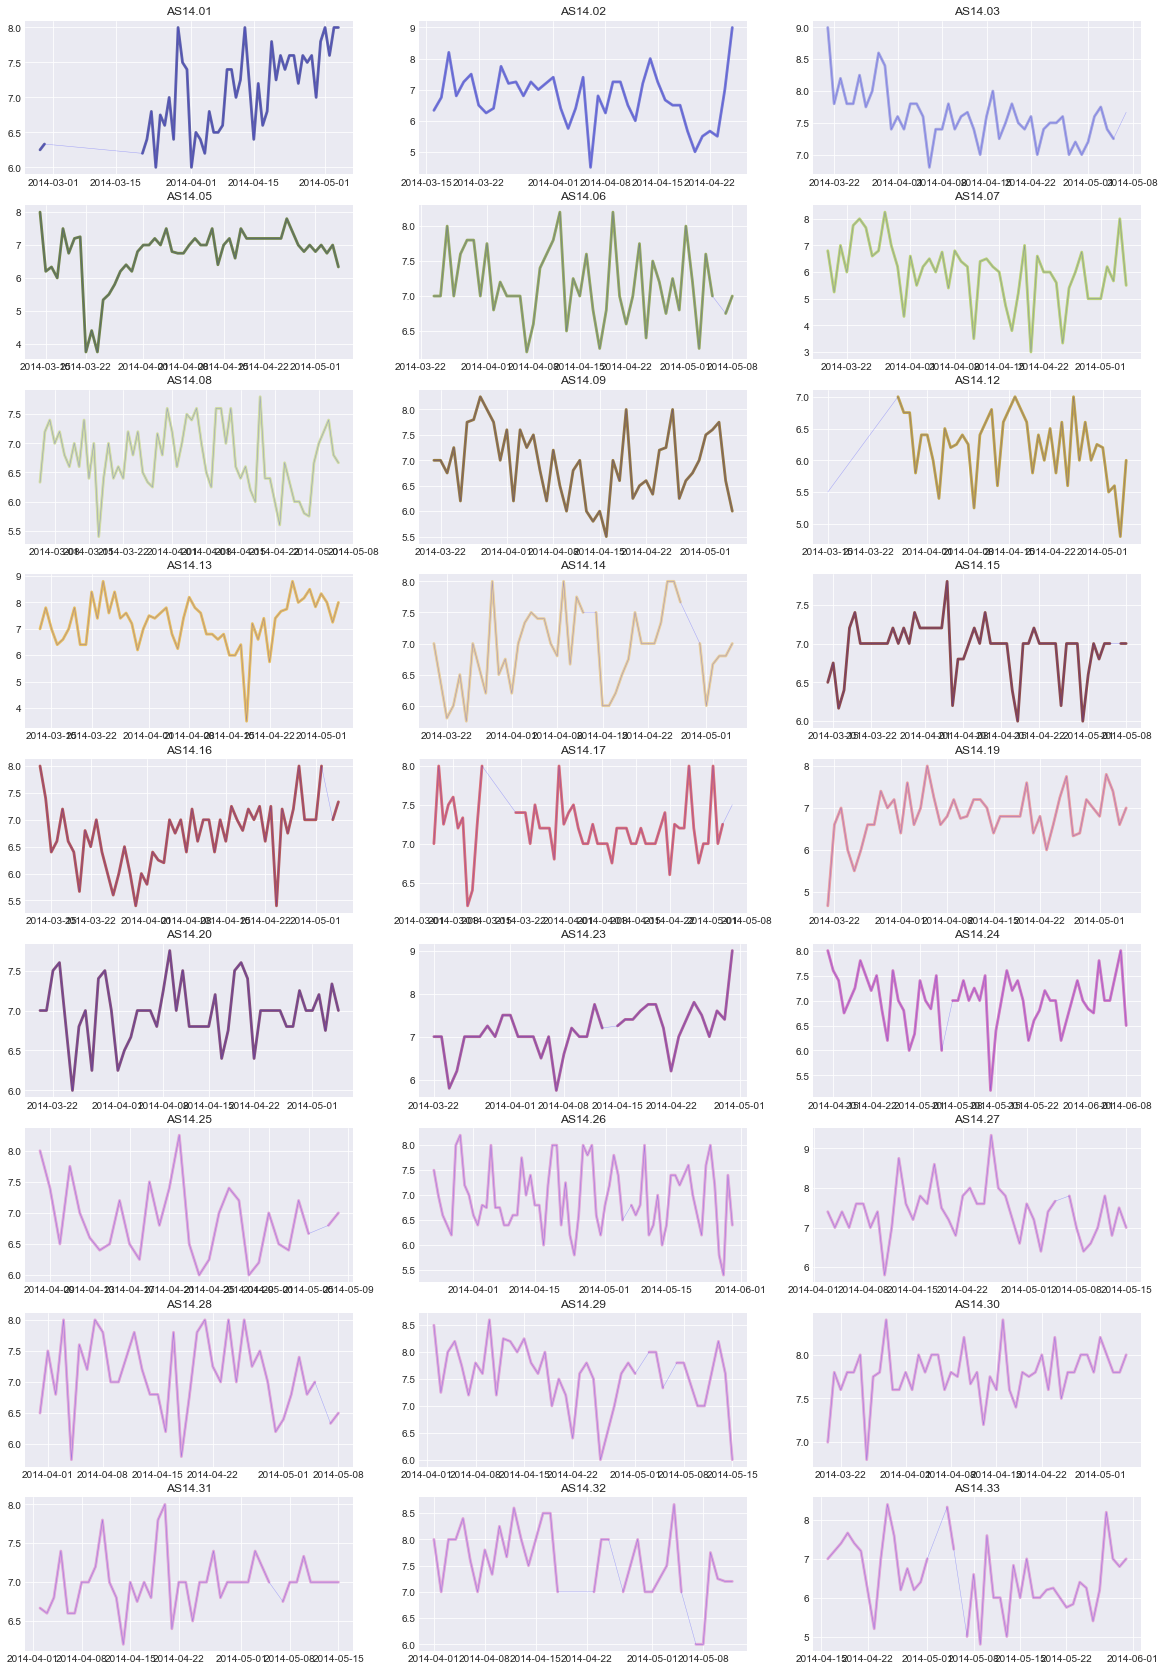

In [57]:
# The plot of each user mood as the date changes
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20b')

f = plt.figure(figsize=(20,30))
num=0
for i in list(fix_df.index.levels[0]):
    num+=1
    ax = f.add_subplot(9,3, num)
    ax.set_title(i)
    ax.plot(fix_df.loc[i,'mood'], marker='', color=palette(num), linewidth=2.8, alpha=0.9, label=i)
    ax.plot(fix_df_filled.loc[i,'mood'], marker='', color='blue', linewidth=0.5, alpha=0.3)

### Imputation by linear interpolation

In [13]:
fix_df3 = fix_df
fix_df3 = fix_df3.dropna(subset=['mood'])

fix_interpolate = fix_df3.interpolate(axis=0)

In [15]:
fix_interpolate.isna().sum()
fix_interpolate

mood  circumplex.arousal  circumplex.valence  \
ID      time                                                           
AS14.01 2014-02-26  6.250000           -0.250000            0.750000   
        2014-02-27  6.333333            0.000000            0.333333   
        2014-03-21  6.200000            0.200000            0.200000   
        2014-03-22  6.400000            0.600000            0.500000   
        2014-03-23  6.800000            0.200000            0.800000   
...                      ...                 ...                 ...   
AS14.33 2014-05-27  6.200000           -0.600000            0.400000   
        2014-05-28  8.200000            0.000000            1.200000   
        2014-05-29  7.000000           -1.333333            1.000000   
        2014-05-30  6.800000           -0.800000           -0.400000   
        2014-05-31  7.000000           -2.000000            1.000000   

                    activity        screen  call  sms  appCat.builtin  \
ID      time                                                            
AS14.01 2014-02-26       NaN           NaN   1.0  2.0             NaN   
        2014-02-27       NaN           NaN   0.0  0.0             NaN   
        2014-03-21  0.134050  17978.907000   6.0  0.0        3139.218   
        2014-03-22  0.236880   6142.161000   3.0  1.0         731.429   
        2014-03-23  0.142741   6773.832001   0.0  0.0        1286.246   
...                      ...           ...   ...  ...             ...   
AS14.33 2014-05-27  0.012704   4089.879001   1.0  2.0         726.391   
        2014-05-28  0.103301  14320.867998  10.0  1.0        2551.046   
        2014-05-29  0.169354   3569.341000   5.0  1.0         400.034   
        2014-05-30  0.192901   9497.646999   4.0  1.0        3044.030   
        2014-05-31  0.192901   9497.646999   4.0  1.0        3044.030   

                    appCat.communication  appCat.entertainment  \
ID      time                                                     
AS14.01 2014-02-26                   NaN                   NaN   
        2014-02-27                   NaN                   NaN   
        2014-03-21              6280.890              1007.456   
        2014-03-22              4962.918                93.324   
        2014-03-23              5237.319                94.346   
...                                  ...                   ...   
AS14.33 2014-05-27              2078.403               124.694   
        2014-05-28              1936.415               614.706   
        2014-05-29               435.105               136.738   
        2014-05-30              1670.842               260.220   
        2014-05-31              1670.842               260.220   

                    appCat.finance  appCat.game  appCat.office  appCat.other  \
ID      time                                                                   
AS14.01 2014-02-26             NaN          NaN            NaN           NaN   
        2014-02-27             NaN          NaN            NaN           NaN   
        2014-03-21          49.544          NaN        172.206       239.751   
        2014-03-22          21.076          NaN          0.000        98.143   
        2014-03-23          43.403          NaN          0.000        72.823   
...                            ...          ...            ...           ...   
AS14.33 2014-05-27           3.106       26.189          0.000       142.686   
        2014-05-28           3.106       26.189        357.909       529.946   
        2014-05-29           3.106       26.189        357.909        29.202   
        2014-05-30           3.106       26.189        357.909        52.610   
        2014-05-31           3.106       26.189        357.909        52.610   

                    appCat.social  appCat.travel  appCat.unknown  \
ID      time                                                       
AS14.01 2014-02-26            NaN            NaN             NaN   
        2014-02-27            NaN

### check how many missing values

In [5]:
missing_data_sum = sp_df.isnull().sum()
missing_data = pd.DataFrame({'total_missing_values': missing_data_sum,'percentage_of_missing_values': (missing_data_sum/sp_df.shape[0])*100})
missing_data

,total_missing_values,percentage_of_missing_values
id,0,0.000000
time,0,0.000000
variable,0,0.000000
value,202,0.053593


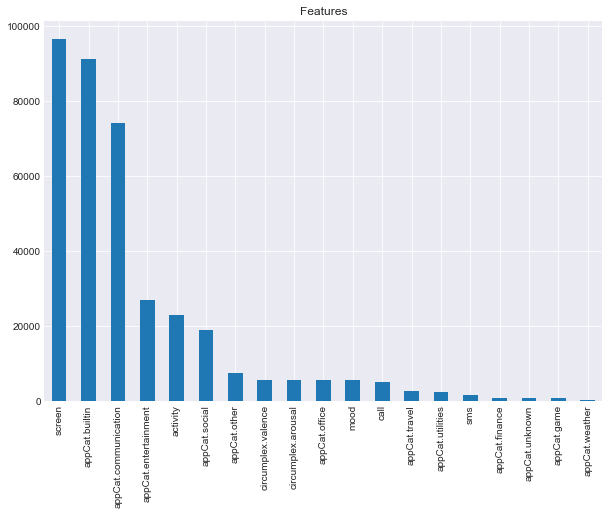

In [32]:
pd.DataFrame(sp_df.variable.value_counts()).plot.bar(title="Features", legend=None,figsize=(10,7));

In [33]:
sp_df.dtypes

id                  object
time        datetime64[ns]
variable            object
value              float64
dtype: object

In [34]:
fix_df

mood  circumplex.arousal  circumplex.valence  activity  \
ID      time                                                                 
AS14.01 2014-02-17   NaN                 NaN                 NaN       NaN   
        2014-02-18   NaN                 NaN                 NaN       NaN   
        2014-02-19   NaN                 NaN                 NaN       NaN   
        2014-02-20   NaN                 NaN                 NaN       NaN   
        2014-02-21   NaN                 NaN                 NaN       NaN   
...                  ...                 ...                 ...       ...   
AS14.33 2014-06-05   NaN                 NaN                 NaN       NaN   
        2014-06-06   NaN                 NaN                 NaN       NaN   
        2014-06-07   NaN                 NaN                 NaN       NaN   
        2014-06-08   NaN                 NaN                 NaN       NaN   
        2014-06-09   NaN                 NaN                 NaN       NaN   

                    screen  call  sms  appCat.builtin  appCat.communication  \
ID      time                                                                  
AS14.01 2014-02-17     NaN   2.0  NaN             NaN                   NaN   
        2014-02-18     NaN   1.0  NaN             NaN                   NaN   
        2014-02-19     NaN   7.0  2.0             NaN                   NaN   
        2014-02-20     NaN   2.0  3.0             NaN                   NaN   
        2014-02-21     NaN   0.0  1.0             NaN                   NaN   
...                    ...   ...  ...             ...                   ...   
AS14.33 2014-06-05     NaN   NaN  NaN             NaN                   NaN   
        2014-06-06     NaN   NaN  NaN             NaN                   NaN   
        2014-06-07     NaN   NaN  NaN             NaN                   NaN   
        2014-06-08     NaN   NaN  NaN             NaN                   NaN   
        2014-06-09     NaN   NaN  NaN             NaN                   NaN   

                    appCat.entertainment  appCat.finance  appCat.game  \
ID      time                                                            
AS14.01 2014-02-17                   NaN             NaN          NaN   
        2014-02-18                   NaN             NaN          NaN   
        2014-02-19                   NaN             NaN          NaN   
        2014-02-20                   NaN             NaN          NaN   
        2014-02-21                   NaN             NaN          NaN   
...                                  ...             ...          ...   
AS14.33 2014-06-05                   NaN             NaN          NaN   
        2014-06-06                   NaN             NaN          NaN   
        2014-06-07                   NaN             NaN          NaN   
        2014-06-08                   NaN             NaN          NaN   
        2014-06-09                   NaN             NaN          NaN   

                    appCat.office  appCat.other  appCat.social  appCat.travel  \
ID      time                                                                    
AS14.01 2014-02-17            NaN           NaN            NaN            NaN   
        2014-02-18            NaN           NaN            NaN            NaN   
        2014-02-19            NaN           NaN            NaN            NaN   
        2014-02-20            NaN           NaN            NaN            NaN   
        2014-02-21            NaN           NaN            NaN            NaN   
...                           ...           ...            ...            ...   
AS14.33 2014-06-05            NaN           NaN            NaN            NaN   
        2014-06-06            NaN           NaN            NaN            NaN   
        2014-06-07            NaN           NaN            NaN            NaN   
        2014-06-08            NaN           NaN            NaN            NaN   
        2014-06-09            NaN           NaN        

In [35]:
mood_data = sp_df[sp_df['variable'] == 'mood']
mood_data

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00,mood,6.0
1,AS14.01,2014-02-26 15:00:00,mood,6.0
2,AS14.01,2014-02-26 18:00:00,mood,6.0
3,AS14.01,2014-02-26 21:00:00,mood,7.0
4,AS14.01,2014-02-27 09:00:00,mood,6.0
...,...,...,...,...
5636,AS14.33,2014-05-30 09:00:00,mood,8.0
5637,AS14.33,2014-05-30 13:00:00,mood,6.0
5638,AS14.33,2014-05-30 19:00:00,mood,8.0
5639,AS14.33,2014-05-30 20:00:00,mood,6.0


In [36]:
sp_df['time'] = pd.to_datetime(sp_df['time'])
mood_data = sp_df[sp_df['variable'] == 'mood']
mood_data

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00,mood,6.0
1,AS14.01,2014-02-26 15:00:00,mood,6.0
2,AS14.01,2014-02-26 18:00:00,mood,6.0
3,AS14.01,2014-02-26 21:00:00,mood,7.0
4,AS14.01,2014-02-27 09:00:00,mood,6.0
...,...,...,...,...
5636,AS14.33,2014-05-30 09:00:00,mood,8.0
5637,AS14.33,2014-05-30 13:00:00,mood,6.0
5638,AS14.33,2014-05-30 19:00:00,mood,8.0
5639,AS14.33,2014-05-30 20:00:00,mood,6.0


In [37]:
# mood_data['id'].value_counts()
mood_data['id'].nunique()

27

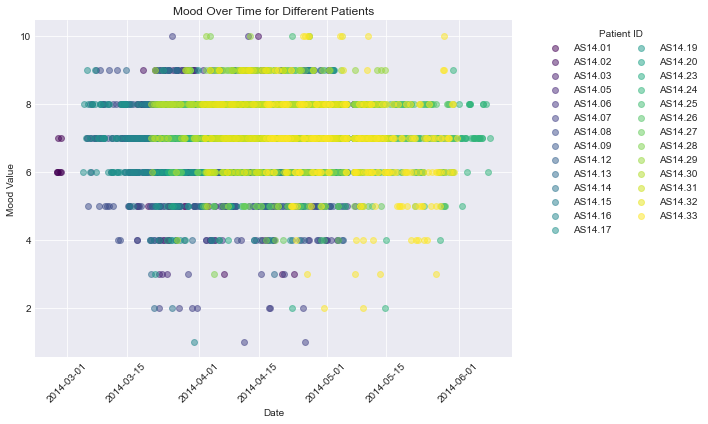

In [38]:
grouped = mood_data.groupby('id')
plt.figure(figsize=(10,6))

colormap = plt.cm.get_cmap('viridis', len(grouped))
colors = [colormap(i) for i in range(len(grouped))]

for i, (group_name, group_data) in enumerate(grouped):
    plt.scatter(group_data['time'], group_data['value'], label=group_name, alpha=0.5, color=colors[i])

    
plt.title('Mood Over Time for Different Patients')
plt.xlabel('Date')
plt.ylabel('Mood Value')

plt.xticks(rotation=45)
plt.legend(title='Patient ID', bbox_to_anchor=(1.05, 1), loc='upper left', ncol = 2)

plt.grid(True)
plt.tight_layout()
plt.show()

### classification
we can use svm to test our dataset

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

D:\anaocnda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data = pd.read_csv('cleaned_data_KNN.csv')
data['ID'] = data['ID'].str.replace('AS', '').astype(float)
data.describe()

,ID,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
count,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000
mean,14.171798,6.990063,-0.103851,0.686753,0.115751,5874.720835,2.381546,0.947634,1449.073993,2593.572721,866.611639,46.632813,222.874790,177.088693,162.481633,1166.051159,124.251834,62.243758,47.906425,15.569939
std,0.097925,0.736465,0.662715,0.434418,0.093899,4622.203622,3.343583,1.852263,2946.148461,2423.395540,1663.851679,79.831681,509.404192,1070.280207,375.945899,1827.057374,453.304466,158.841373,150.987541,24.767357
min,14.010000,3.000000,-2.000000,-1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.080000,6.600000,-0.600000,0.400000,0.054258,2401.537000,0.000000,0.000000,257.022750,784.782500,13.102750,4.420000,47.372700,0.000000,40.627500,82.330250,0.000000,0.000000,0.000000,0.000000
50%,14.160000,7.000000,0.000000,0.800000,0.093980,4960.965000,1.000000,0.000000,762.311000,1991.420000,345.150000,26.133900,119.002200,10.357200,61.622000,549.946000,3.919600,9.958100,3.827600,6.911300
75%,14.260000,7.500000,0.400000,1.000000,0.142900,8215.138249,3.000000,1.000000,1549.903500,3654.042000,1081.570350,61.107950,217.265600,78.805200,128.466350,1609.331250,106.575250,66.150600,28.553650,21.251800
max,14.330000,9.333333,2.000000,2.000000,0.549430,36204.105001,31.000000,17.000000,40323.877000,20718.749000,35937.645000,1321.104000,12996.495000,33283.021000,4335.307000,30073.421000,10548.116000,2821.547000,2257.626000,366.937000


In [12]:
data['mood_class'] = data['mood'].apply(lambda x: 0 if x <= 4 else (1 if 5 <= x <= 7 else 2))
feature = data.drop(['mood', 'time', 'mood_class'], axis=1)
label = data['mood_class']

# feature 
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7716535433070866
